<a href="https://colab.research.google.com/github/gpriya32/Linear-Discriminant-Analysis/blob/master/Fisher_Linear_Discriminant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pd.read_csv('/content/drive/My Drive/a1_data/a1_d1.csv')

,-0.598282822,1.02353385,1
0,1.115929,0.512127,1
1,1.169815,-1.072747,0
2,0.631926,-0.255663,0
3,0.052532,1.198445,1
4,1.947437,0.875587,1
...,...,...,...
994,-1.226337,-0.507286,0
995,0.107578,0.634166,1
996,-0.317336,-0.357282,0
997,-0.295127,0.746446,1


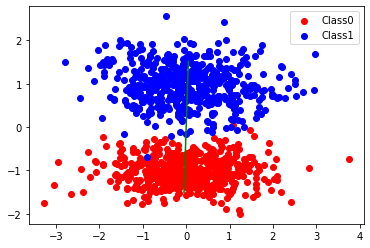

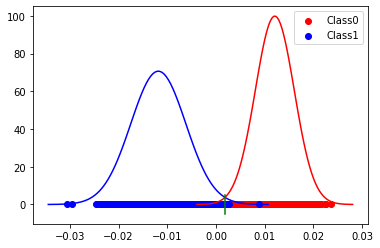

Accuracy is :  99.3 %
F-score is  0.9929929929929929


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import csv  
from scipy.stats import norm
import scipy.stats as stats
import math



def normdist(mu, sigma, col):
	x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
	plt.plot(x, stats.norm.pdf(x, mu, sigma), color=col)
	
def solve(m1,m2,std1,std2):
	a = 1/(2*std1**2) - 1/(2*std2**2)
	b = m2/(std2**2) - m1/(std1**2)
	c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
	return np.roots([a,b,c])


def plotline(poi):	
	y = np.linspace(-5,5)
	plt.plot([poi]*len(y), y, color='green')	


def accuracy(poi, proj0,proj1):
	count =0
	for point in proj0:
		if point > poi:
			count=count + 1
							
	for point in proj1:
		if point < poi:
			count =count +1			
	print("Accuracy is : " , (count/len(class0+class1)*100),"%")		


def f_measure(poi, proj0, proj1):
    
    true_positives = 0
    false_positives = 0
    total_positives = 0

    for i in proj1 :
        if i<poi:
           true_positives += 1
    
    for i in proj0:
    	if i<poi:
    		false_positives+=1

    total_positives=len(proj1)
    
	
    precision = true_positives / (false_positives + true_positives)
    recall = true_positives / total_positives

    print("F-score is ", (2*precision*recall)/(precision+recall))




def load_dataset(data_file):
    with open(data_file) as csv_file:
        dataset = list(csv.reader(csv_file, delimiter=','))
    return dataset

dataset = load_dataset("/content/drive/My Drive/a1_data/a1_d1.csv")
class0=[]
class1=[]
for data_point in dataset:
	if data_point[-1]=='0':
		data_point = data_point[:-1]
		class0.append(data_point)
	else:
		data_point = data_point[:-1]
		class1.append(data_point)	



c0=np.array(class0).astype(np.float)
c1=np.array(class1).astype(np.float)

mean0=np.mean(c0, axis=0)
mean1=np.mean(c1, axis=0)


s0=(len(class0)-1)*np.cov(c0, rowvar=0).astype(np.float)
s1=(len(class1)-1)*np.cov(c1, rowvar=0).astype(np.float)

S=s0+s1

S_inv = np.linalg.inv(S).astype(np.float)

v=np.matmul(S_inv, mean0-mean1).astype(np.float)

y0=np.matmul(np.transpose(v), np.transpose(c0)).astype(np.float)
y1=np.matmul(np.transpose(v), np.transpose(c1)).astype(np.float)

plt.scatter(c0[:,0], c0[:,1] ,color="red", label='Class0')
plt.scatter(c1[:,0], c1[:,1],color="blue", label='Class1')
x = np.linspace(-0.05,0.05)
y = v[1]/v[0]*x
plt.plot(x, y, color='green')
plt.legend()
plt.show()

normdist(np.mean(y0),np.std(y0), 'red')
normdist(np.mean(y1),np.std(y1), 'blue')
result = solve(np.mean(y0),np.mean(y1),np.std(y0),np.std(y1))
plotline(result[1])
plt.scatter(y0,len(y0)*[0], color='red', label='Class0') 
plt.scatter(y1,len(y1)*[0], color='blue', label='Class1')
plt.legend()
plt.show()

# print("Threshold value: ", result[1])
accuracy(result[1], y0,y1)
f_measure(result[1], y0, y1)







In [15]:
pd.read_csv('/content/drive/My Drive/a1_data/a1_d2.csv')

,-6.672418458,-1.206198345,-1.081049865,0
0,1.675598,0.614994,-0.971600,0
1,-4.039058,0.335102,0.544618,1
2,0.793526,-0.235277,0.551771,1
3,3.820273,-0.274691,0.454743,1
4,-4.914811,1.232170,-0.663065,0
...,...,...,...,...
994,-3.680139,0.966962,-0.904337,0
995,-4.063900,0.802611,1.023708,1
996,-0.814430,-0.693945,0.876776,1
997,-0.325122,-0.759024,1.299772,1


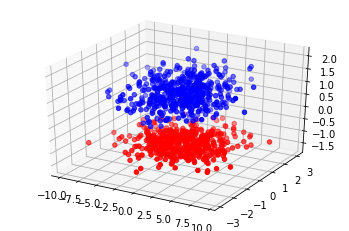

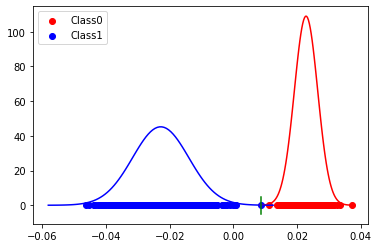

Accuracy is :  100.0
F-score is  1.0
Threshold value:  0.008813863129467877


In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import csv  
from scipy.stats import norm
import scipy.stats as stats
import math


def normdist(mu, sigma, col):
	x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
	plt.plot(x, stats.norm.pdf(x, mu, sigma), color=col)
	
def solve(m1,m2,std1,std2):
	a = 1/(2*std1**2) - 1/(2*std2**2)
	b = m2/(std2**2) - m1/(std1**2)
	c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
	return np.roots([a,b,c])


def plotline(poi):	
	y = np.linspace(-5,5)
	plt.plot([poi]*len(y), y, color='green')	


def accuracy(poi, proj0,proj1):
	count =0
	for point in proj0:
		if point > poi:
			count=count + 1

	for point in proj1:
		if point <poi:
			count =count +1			
	print("Accuracy is : " , (count/len(class0+class1)*100))		

def f_measure(poi, proj0, proj1):
    true_positives = 0
    false_positives = 0
    total_positives = 0
    for i in proj1 :
        if i<poi:
           true_positives += 1
    
    for i in proj0:
    	if i<poi:
    		false_positives+=1

    total_positives=len(proj1)
    precision = true_positives / (false_positives + true_positives)
    recall = true_positives / total_positives
    print("F-score is ", (2*precision*recall)/(precision+recall))


def load_dataset(data_file):
    with open(data_file) as csv_file:
        dataset = list(csv.reader(csv_file, delimiter=','))
    return dataset

dataset = load_dataset("/content/drive/My Drive/a1_data/a1_d2.csv")
class0=[]
class1=[]
for data_point in dataset:
	if data_point[-1]=='0':
		data_point = data_point[:-1]
		class0.append(data_point)
	else:
		data_point = data_point[:-1]
		class1.append(data_point)	



c0=np.array(class0).astype(np.float)
c1=np.array(class1).astype(np.float)

mean0=np.mean(c0, axis=0)
mean1=np.mean(c1, axis=0)


s0=(len(class0)-1)*np.cov(c0, rowvar=0).astype(np.float)
s1=(len(class1)-1)*np.cov(c1, rowvar=0).astype(np.float)

S=s0+s1

S_inv = np.linalg.inv(S).astype(np.float)

w=np.matmul(S_inv, mean0-mean1).astype(np.float)

y0=np.matmul(np.transpose(w), np.transpose(c0)).astype(np.float)
y1=np.matmul(np.transpose(w), np.transpose(c1)).astype(np.float)

ax = plt.axes(projection='3d')
ax.scatter3D(c0[:,0], c0[:,1], c0[:,2] ,color="red", label='class0')
ax.scatter3D(c1[:,0], c1[:,1], c1[:,2] ,color="blue", label='class1')
plt.show()

normdist(np.mean(y0),np.std(y0), 'red')
normdist(np.mean(y1),np.std(y1), 'blue')
result = solve(np.mean(y0),np.mean(y1),np.std(y0),np.std(y1))
plotline(result[1])
plt.scatter(y0,len(y0)*[0], color='red', label='Class0') 
plt.scatter(y1,len(y1)*[0], color='blue', label='Class1')
plt.legend()
plt.show()

accuracy(result[1], y0,y1)
f_measure(result[1], y0,y1)
print("Threshold value: ",result[1])

